# ДЗ. Применение PCA

Data Set Information:

* The dataset was acquired and annotated by professional physicians at 'Hospital Universitario de Caracas'. 
* The subjective judgments (target variables) were originally done in an ordinal manner (poor, fair, good, excellent) and was discretized in two classes (bad, good). 
* Images were randomly sampled from the original colposcopic sequences (videos). 
* The original images and the manual segmentations are included in the 'images' directory. 
* The dataset has three modalities (i.e. Hinselmann, Green, Schiller). 
* The target variables are expert::X (X in 0,...,5) and consensus.

cervix_area: image area with cervix.

os_area: image area with external os. 

walls_area: image area with vaginal walls. 

speculum_area: image area with the speculum.

artifacts_area: image area with artifacts.

cervix_artifacts_area: cervix area with the artifacts. 

os_artifacts_area: external os area with the artifacts.

walls_artifacts_area: vaginal walls with the artifacts.

speculum_artifacts_area: speculum area with the artifacts. 

cervix_specularities_area: cervix area with the specular reflections.

os_specularities_area: external os area with the specular reflections. 

walls_specularities_area: vaginal walls area with the specular reflections. 

speculum_specularities_area: speculum area with the specular reflections. 

specularities_area: total area with specular reflections. 

area_h_max_diff: maximum area differences between the four cervix quadrants.

rgb_cervix_r_mean: average color information in the cervix (R channel). 

rgb_cervix_r_std: stddev color information in the cervix (R channel). 

rgb_cervix_r_mean_minus_std: (avg - stddev) color information in the cervix (R channel). 

rgb_cervix_r_mean_plus_std: (avg + stddev) information in the cervix (R channel). 

rgb_cervix_g_mean: average color information in the cervix (G channel). 

rgb_cervix_g_std: stddev color information in the cervix (G channel). 

rgb_cervix_g_mean_minus_std: (avg - stddev) color information in the cervix (G channel).

rgb_cervix_g_mean_plus_std: (avg + stddev) color information in the cervix (G channel). 

rgb_cervix_b_mean: average color information in the cervix (B channel). 

rgb_cervix_b_std: stddev color information in the cervix (B channel). 

rgb_cervix_b_mean_minus_std: (avg - stddev) color information in the cervix (B channel). 

rgb_cervix_b_mean_plus_std: (avg + stddev) color information in the cervix (B channel). 

rgb_total_r_mean: average color information in the image (B channel). 

rgb_total_r_std: stddev color information in the image (R channel). 

rgb_total_r_mean_minus_std: (avg - stddev) color information in the image (R channel). 

rgb_total_r_mean_plus_std: (avg + stddev) color information in the image (R channel). 

rgb_total_g_mean: average color information in the image (G channel). 

rgb_total_g_std: stddev color information in the image (G channel). 

rgb_total_g_mean_minus_std: (avg - stddev) color information in the image (G channel). 

rgb_total_g_mean_plus_std: (avg + stddev) color information in the image (G channel). 

rgb_total_b_mean: average color information in the image (B channel). 

rgb_total_b_std: stddev color information in the image (B channel). 

rgb_total_b_mean_minus_std: (avg - stddev) color information in the image (B channel). 

rgb_total_b_mean_plus_std: (avg + stddev) color information in the image (B channel). 

hsv_cervix_h_mean: average color information in the cervix (H channel). 

hsv_cervix_h_std: stddev color information in the cervix (H channel). 

hsv_cervix_s_mean: average color information in the cervix (S channel). 

hsv_cervix_s_std: stddev color information in the cervix (S channel). 

hsv_cervix_v_mean: average color information in the cervix (V channel). 

hsv_cervix_v_std: stddev color information in the cervix (V channel). 

hsv_total_h_mean: average color information in the image (H channel). 

hsv_total_h_std: stddev color information in the image (H channel). 

hsv_total_s_mean: average color information in the image (S channel). 

hsv_total_s_std: stddev color information in the image (S channel). 

hsv_total_v_mean: average color information in the image (V channel). 

hsv_total_v_std: stddev color information in the image (V channel). 

fit_cervix_hull_rate: Coverage of the cervix convex hull by the cervix. 

fit_cervix_hull_total: Image coverage of the cervix convex hull. 

fit_cervix_bbox_rate: Coverage of the cervix bounding box by the cervix. 

fit_cervix_bbox_total: Image coverage of the cervix bounding box. 

fit_circle_rate: Coverage of the cervix circle by the cervix. 

fit_circle_total: Image coverage of the cervix circle. 

fit_ellipse_rate: Coverage of the cervix ellipse by the cervix. 

fit_ellipse_total: Image coverage of the cervix ellipse. 

fit_ellipse_goodness: Goodness of the ellipse fitting. 

dist_to_center_cervix: Distance between the cervix center and the image center. 

dist_to_center_os: Distance between the cervical os center and the image center. 

experts::0: subjective assessment of the Expert 0 (target variable). 
experts::1: subjective assessment of the Expert 1 (target variable). 
experts::2: subjective assessment of the Expert 2 (target variable). 
experts::3: subjective assessment of the Expert 3 (target variable). 
experts::4: subjective assessment of the Expert 4 (target variable). 
experts::5: subjective assessment of the Expert 5 (target variable). 
consensus: subjective assessment of the consensus (target variable)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Считывание данных 

In [2]:
data = pd.read_csv('green.csv', sep = ',', engine = 'python')

Задаем x и y

In [4]:
X = data.drop(('consensus'), axis = 1)
y = data['consensus']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y.unique())
y_tr = le.transform(y)

# Principal Components Analysis (PCA)

Изначально у нас размерность признаков равна 62 попробуем ее уменьшить до 31

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 31)
pca.fit(X)
pca_x = pca.transform(X)
pca_x.shape

(98, 31)

Разобьем выборку на тестовую и обучаемую

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_tr, test_size = 0.33, random_state = 42)

Используем классификатор Gradient Boosted Trees с 30 деревьями

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

GBT = GradientBoostingClassifier(n_estimators=30)
GBT.fit(X_train, y_train)
    
y_train_pred = GBT.predict(X_train)
y_test_pred = GBT.predict(X_test)
     
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.121212121212


Исследуем зависимость ошибки в выборках от количества главных компонент.
Зададим несколько значений

In [23]:
pca_count_array = np.arange(2,35,1)

In [24]:
test_error_GBT = []
train_error_GBT = []

for pca_count in pca_count_array:
    pca = PCA(n_components = pca_count)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_tr, test_size = 0.33, random_state = 42)
    
    GBT = GradientBoostingClassifier(n_estimators=30)
    GBT.fit(X_train, y_train)
    
    y_train_pred = GBT.predict(X_train)
    y_test_pred = GBT.predict(X_test)
    
    train_error_GBT.append(np.mean(y_train != y_train_pred))
    test_error_GBT.append(np.mean(y_test != y_test_pred))

In [25]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.151515151515


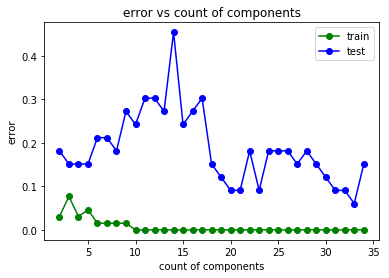

In [26]:
plt.plot(pca_count_array, train_error_GBT, 'g-o', label = 'train')
plt.plot(pca_count_array, test_error_GBT, 'b-o', label = 'test')

plt.title('error vs count of components')
plt.xlabel('count of components')
plt.ylabel('error')
plt.legend()
pass

Смотря на график можно заметить, что изменение числа компонент не влияет на ошибку при обучающей выборке, начиная с pca_count = 10. Про зависимость ошибки от числа компонент на тестовой выборке мало что можно подметить. Ведет себя скочкообразно.

Минимальные значения ошибок на обучающей и тестовой выборке:

In [27]:
min_train_error = np.min(train_error_GBT)
min_test_error = np.min(test_error_GBT)
print(min_train_error, min_test_error)

0.0 0.0606060606061


Найдем число компонент, при котором ошибка на тестовой выборке минимальна 

In [28]:
print(pca_count_array[test_error_GBT == min_test_error])

[33]
